<a href="https://colab.research.google.com/github/fatmas1982/Neural-network-implementation-from-scratch/blob/main/Chapter_4_Activation_in_the_Hidden_Layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nnfs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np 
import nnfs
from nnfs.datasets import spiral_data  # See for code: https://gist.github.com/Sentdex/454cb20ec5acf0e76ee8ab8448e6266c


#**ReLU**

In [133]:

nnfs.init()

X, lable = spiral_data(100, 3)   


class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.10 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases


class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)


layer1 = Layer_Dense(2,3)
activation1 = Activation_ReLU()

layer1.forward(X)

#print(layer1.output)
activation1.forward(layer1.output)
#print(activation1.output[:5])

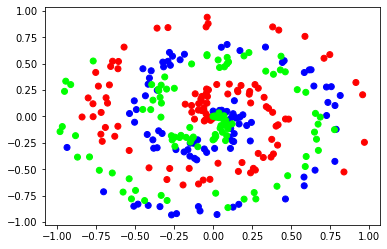

In [134]:
plt.scatter(X[:,0],X[:,1],c=lable,cmap='brg')

plt.show()

In [135]:
y=lable.reshape(300,1)
z = np.hstack((X,y) )
z.shape

(300, 3)

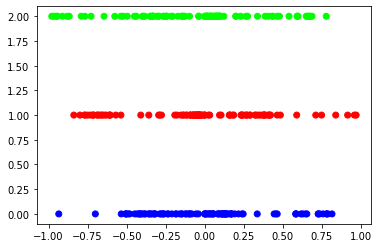

In [136]:
plt.scatter(z[:,:1],z[:,2],c=y,cmap='brg')

plt.show()

In [140]:
print(layer1.output[:5])

[[ 0.          0.          0.        ]
 [-0.00104752  0.00113954 -0.00047984]
 [-0.00274148  0.00317292 -0.00086922]
 [-0.00421884  0.00526663 -0.00055913]
 [-0.00577077  0.00714014 -0.0008943 ]]


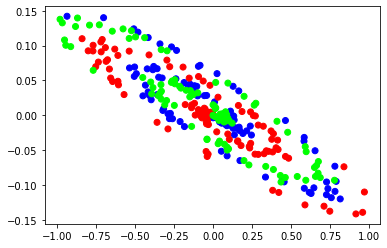

In [141]:
z_layer1 = np.hstack((X,layer1.output))#,X) )
z_layer1.shape
plt.scatter(z_layer1[:,:1],z_layer1[:,2],c=y,cmap='brg')

plt.show()

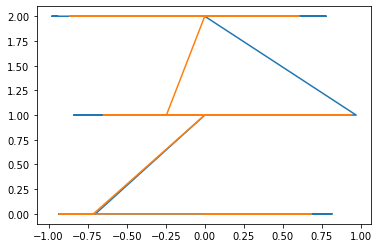

In [105]:
import numpy as np
import matplotlib.pyplot as plt
x= X#[:5]
y=layer1.output#[:5]
plt.plot(x,lable)
plt.show()

In [142]:
print(activation1.output[:5])

[[0.         0.         0.        ]
 [0.         0.00113954 0.        ]
 [0.         0.00317292 0.        ]
 [0.         0.00526663 0.        ]
 [0.         0.00714014 0.        ]]


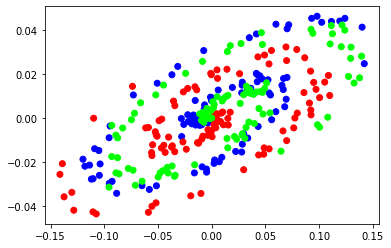

In [143]:
z_activation1 = np.hstack((layer1.output,activation1.output) )
z_activation1.shape
plt.scatter(z_activation1[:,:1],z_activation1[:,2],c=lable,cmap='brg')

plt.show()

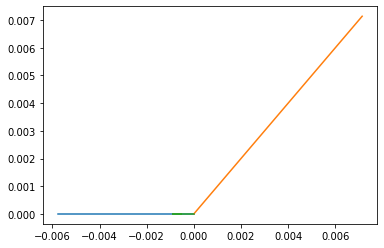

In [145]:
import numpy as np
import matplotlib.pyplot as plt
x= layer1.output[:5]
y=activation1.output[:5]
plt.plot(x,y)
plt.show()

In [146]:
layer1.output[1:5]

array([[-0.00104752,  0.00113954, -0.00047984],
       [-0.00274148,  0.00317292, -0.00086922],
       [-0.00421884,  0.00526663, -0.00055913],
       [-0.00577077,  0.00714014, -0.0008943 ]], dtype=float32)

#**The Softmax Activation Function**

In [25]:
import numpy as np 
import nnfs
from nnfs.datasets import spiral_data  # See for code: https://gist.github.com/Sentdex/454cb20ec5acf0e76ee8ab8448e6266c

nnfs.init()

X, lable = spiral_data(100, 3)   


class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.10 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases


class Activation_softmax:
    # Forward pass
    def forward(self, inputs):
        # Get unnormalized probabilities
        exp_values = np.exp(inputs- np.max(inputs,axis=1,keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values/np.max(inputs,axis=1,keepdims=True)
        self.output = probabilities


layer2 = Layer_Dense(2,3)
activation2 = Activation_softmax()

layer2.forward(X)

#print(layer1.output)
activation2.forward(layer2.output)
#print(activation1.output[:5])

<ipython-input-25-4fef558a54ff>:24: RuntimeWarning: divide by zero encountered in true_divide
  probabilities = exp_values/np.max(inputs,axis=1,keepdims=True)


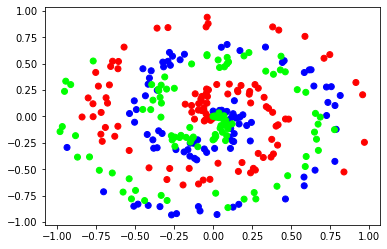

In [26]:
plt.scatter(X[:,0],X[:,1],c=lable,cmap='brg')

plt.show()

In [27]:
y=lable.reshape(300,1)
z = np.hstack((X,y) )
z.shape

(300, 3)

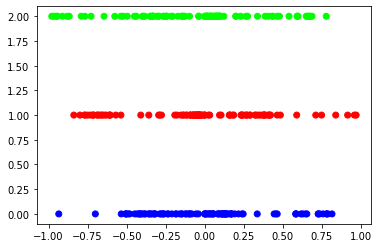

In [28]:
plt.scatter(z[:,:1],z[:,2],c=y,cmap='brg')

plt.show()

In [29]:
print(layer2.output[:5])

[[ 0.          0.          0.        ]
 [-0.00104752  0.00113954 -0.00047984]
 [-0.00274148  0.00317292 -0.00086922]
 [-0.00421884  0.00526663 -0.00055913]
 [-0.00577077  0.00714014 -0.0008943 ]]


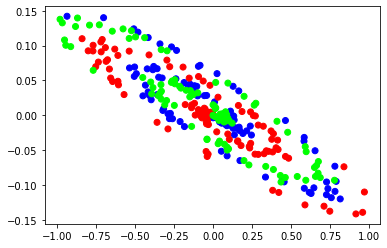

In [30]:
z_layer2 = np.hstack((X,layer2.output))#,X) )
z_layer2.shape
plt.scatter(z_layer2[:,:1],z_layer2[:,2],c=y,cmap='brg')

plt.show()

In [11]:
print(activation2.output[:5])

[[      inf       inf       inf]
 [875.63293 877.55005 876.13007]
 [313.30905 315.16757 313.89618]
 [188.08234 189.8749  188.77194]
 [138.25667 140.05325 138.93253]]


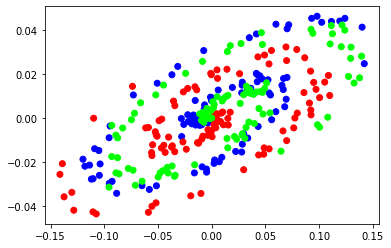

In [13]:
z_activation2 = np.hstack((layer2.output,activation2.output) )
z_activation2.shape
plt.scatter(z_activation2[:,:1],z_activation2[:,2],c=lable,cmap='brg')

plt.show()

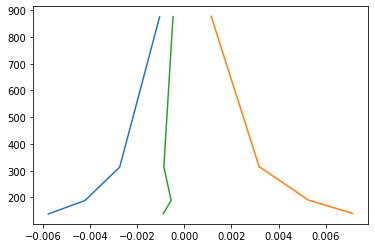

In [14]:
import numpy as np
import matplotlib.pyplot as plt
x= layer2.output[:5]
y=activation2.output[:5]
plt.plot(x,y)
plt.show()



In [31]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.10 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases


class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

class Activation_softmax:
    # Forward pass
    def forward(self, inputs):
        # Get unnormalized probabilities
        exp_values = np.exp(inputs- np.max(inputs,axis=1,keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values/np.max(inputs,axis=1,keepdims=True)
        self.output = probabilities



In [32]:
Dense1 = Layer_Dense(2,3)
activation1 = Activation_ReLU()

Dense2 = Layer_Dense(3,3)
activation2 = Activation_softmax()

Dense1.forward(X)
activation1.forward(Dense1.output)



Dense2.forward(activation1.output)
activation2.forward(Dense2.output)
#print(activation1.output[:5])

<ipython-input-31-02e6e46a6549>:19: RuntimeWarning: divide by zero encountered in true_divide
  probabilities = exp_values/np.max(inputs,axis=1,keepdims=True)


In [33]:
print(activation1.output[:5])

[[0.         0.         0.        ]
 [0.         0.         0.00124748]
 [0.         0.         0.00257092]
 [0.         0.         0.00255896]
 [0.         0.         0.00373274]]


In [34]:
print(activation2.output[:5])

[[        inf         inf         inf]
 [-130076.63  -130075.9   -130065.95 ]
 [ -63116.664  -63115.926  -63105.99 ]
 [ -63411.71   -63410.97   -63401.035]
 [ -43471.55   -43470.81   -43460.875]]


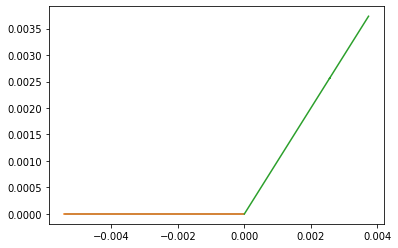

In [35]:
import numpy as np
import matplotlib.pyplot as plt
x= Dense1.output[:5]#[0]
y=activation1.output[:5]#[0]
plt.plot(x,y)
plt.show()

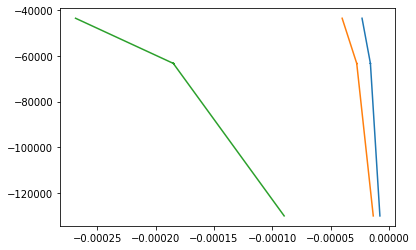

In [37]:
import numpy as np
import matplotlib.pyplot as plt
x= Dense2.output[:5]#[0]
y=activation2.output[:5]#[0]
plt.plot(x,y)
plt.show()